<a href="https://colab.research.google.com/github/pitaconsumer/pitaconsumer.github.io./blob/master/Race_Stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Pike's Peak Race Results for Females & Males

By: Mehr Qayyum

**Objective: Explore Race Results by Gender and Percentile**
1. What are the mean, median, mode, and range of the race results for all racers by gender?
2. Analyze the difference between gun and net time race results.
3. How much time separates Chris Doe from the top 10 percentile of racers of the same division?
4. Compare the race results of each division.

** Methodology**

1) Upload and Review Columns to Determine Features Needed for Analysis.
2) Clean Data Set and Debug Timestamp results.
3) Explore and prepare descriptive statistics using Pandas and Scipy.
4) Visualize summary results for females and males. 5) Summarize results within this section by addressing questions.

**Data Description: Fields as Features**
***Field Name Description***
*   Place *The order in which each racer finished relative to racers of the same gender*

*   Div/Tot A division comprises racers of the same gender and age group* / The total number of racers within the same division
*   Num *Racer’s bib number*
*   Name *Name of the racer*
*   Ag *Age of the racer*
*   Hometown *Hometown of the racer*
*   Gun Tim *Elapsed time from the formal start of the race and when the racer crossed the finish line*
*  Net Tim *Elapsed time from when the racer crossed the starting line and when the racer crossed the finish line*
*   Pace *Racer’s average time per mile during this race*

# Summary Results
## Question 1. What are the mean, median, mode, and range of the race results for all racers by gender? ~Note: times rounded to nearest tenth of second.


*   Regarding women: the mean was 1 hour, 8 minutes and 39.4 seconds (extrapolated from raw time stamp '01:08:39.357695488' and rounded to the nearest tenth of a second). Vicki Aylor is the Median observation for Median race time, or 'Gun Tim': 1 hour, 10 minutes and 18 seconds. 

** The Mode is a four-way tie: a) (01:04:01) 1 Hour, 4 Minutes, 1 Second; b) 
01:03:03 - 1 Hour, 3 Minutes, 3 Seconds; c) 
01:02:40 - 1 Hour, 2 Minutes, 40 Seconds; and d) 01:01:47 - 1 Hour, 1 Minute, 47 Seconds. 

** The range is represented by the Florence Jepkosgei (fastest time) and Maximum (slowest time). For results, we calculated the range of 'Gun Tim' between Jepkosgei's 32 minutes and 59 seconds and the maximum, of 1 hour, fifty minutes and 31 seconds from taking the Maximum transformed Timestamp('1900-01-01 01:50:31).

*   Regarding men, the mean was 1 hour, 7 minutes, and 24 seconds. Vincent George is the Median observation for Median race time, or 'Gun Tim': 55 minutes and 31 secoonds. 

** The Mode is a two-way tie: a) 55 minutes and 13 seconds and b) 1 hour, 4 minutes and 56 seconds. 

** The range is represented by the Minimum (fastest time) and Maximum (slowest time). For results, we calculated the range of 'Gun Tim' between: The slowest time, represented by Maximum of transformed 'Gun Tim' is 1 hour, 44 minutes and 7 seconds, according to Timstamp. The fastest time, is represented by the first place winner from Kenya, Joshua Kemei. He completed a 'Gun Tim' of 28 minutes and 48 seconds at a 4.38 minute pace, according to our sorting values of 'transformed_time' in ascending order.


 and the 1 hour, 50 minutes and 31 seconds (maximum from Timestamp('1900-01-01 01:50:31')).


## Question 2. Analyze the difference between gun and net time race results.

Timedelta represents calculated difference in time period.

*   Regarding female runners: the difference was 28.7 seconds, according to the Timedelta. 
*   Regarding male runners: the difference was 27.2 seconds, according to the Timedelta. 


## Question 3. How much time separates Chris Doe from the top 10 percentile of racers of the same division?

We see that the top ten percent among male participants is: '01:00:44.800000', which is 1 hour and 44 seconds. Chris Doe ran 53 minutes  and 7 seconds. He was 7 minutes and 37 seconds faster than the entire cohort of male participants.


## Question 4. Compare the race results of each division. 

Please see tables below under visualizations.

In [1]:
#Import libraries for data upload, clean, analysis and visualization
#Use Scipy for stats to compute CDF if empiricaldist is acting up
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from pytz import utc, timezone
from time import mktime
from datetime import datetime, timedelta
from sklearn.preprocessing import LabelEncoder 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
#Check data for Female Data
df = pd.read_csv('/content/MA_Exer_PikesPeak_Females.txt', delimiter='\t',)
df

,Place,Div/Tot,Num,Name,Ag,Hometown,Gun Tim,Net Tim,Pace
0,1,1/86,30,Florence Jepkosgei,22.0,Kenya .,32:59,32:58#,5:19
1,2,2/86,8,Eunice Chepkirui,21.0,Kenya .,33:14,33:13#,5:21
2,3,1/247,3200,Elena Orlova,36.0,Gaithersburg MD,34:26,34:25#,5:33
3,4,1/173,2,Susannah Kvasnicka,34.0,Great Falls VA,34:43,34:42#,5:35
4,5,1/142,6,Casey Smith,26.0,Arlington VA,35:04,35:02,5:39
...,...,...,...,...,...,...,...,...,...
1100,1101,247/247,1847,Alicia Maxwell,35.0,Germantown MD,1:43:47,1:40:39,16:12
1101,1102,110/110,2618,Regina Tenali,47.0,Gaithersburg MD,1:50:31,1:45:22,16:58
1102,1103,171/173,986,Nirmala Donley,32.0,Ellicott City M,D 1:50:31,1:45:22,16:58
1103,1104,172/173,1214,Heidi Gertner,34.0,Bethesda MD,1:46:49,1:46:49,17:12


In [3]:
#Identify data types of Female Race Runners' data to anticipate transforming columns into features
##Informs Pre-processing for Data Munging/Cleaning
df.dtypes

Place         int64
Div/Tot      object
Num           int64
Name         object
Ag          float64
Hometown     object
Gun Tim      object
Net Tim      object
Pace         object
dtype: object

In [3]:
#Look for missing values
df.isnull().sum()

Place       0
Div/Tot     2
Num         0
Name        0
Ag          1
Hometown    0
Gun Tim     0
Net Tim     0
Pace        0
dtype: int64

# Data Munging
We see that variables/labels of interest: 'Div/Tot', 'Gun Tim', and 'Net Tim' are objects, which will be hard to run numerical functions (aggregate statistics) unless we transform their data type from string to integar and datetime, respectively.

In [ ]:
#Drop rows that have missing 'Div/Tot' b/c we've got a question on comparing times
df = df.dropna(subset=['Div/Tot',0], inplace=True)
df

In [12]:
#Explore numerical feature
df.value_counts('Ag')
#Mode of Female 'Ag'/age is 36 years old

Ag
36.0    55
37.0    50
35.0    49
39.0    48
38.0    45
        ..
11.0     1
70.0     1
1.0      1
0.0      1
74.0     1
Length: 65, dtype: int64

In [13]:
df.describe()

,Place,Num,Ag
count,1105.000000,1105.000000,1104.000000
mean,553.000000,1739.652489,36.901268
std,319.130329,882.083477,10.553505
min,1.000000,2.000000,-1.000000
25%,277.000000,982.000000,30.000000
50%,553.000000,1762.000000,37.000000
75%,829.000000,2497.000000,43.000000
max,1105.000000,3371.000000,74.000000


In [14]:
#Similar to Male data set
# Confirm that 'Gun Tim' is read as object data type before transformation
df['Gun Tim'].dtype

dtype('O')

In [15]:
#Female data set
#Create new series to extract symbols from times
new_net_time_f = df['Net Tim']
print(new_net_time_f)

0        32:58#
1        33:13#
2        34:25#
3        34:42#
4         35:02
         ...   
1100    1:40:39
1101    1:45:22
1102    1:45:22
1103    1:46:49
1104    1:46:49
Name: Net Tim, Length: 1105, dtype: object


In [16]:
#Transform 'Gun Tim' to serve as feature of analysis
#to convert time format 'Gun Tim' column which is an object to readable timestamp
df['transformed_time_f'] = pd.to_datetime(df['Gun Tim'], format='%H:%M:%S', errors='coerce')
df['transformed_time_f']

0                      NaT
1                      NaT
2                      NaT
3                      NaT
4                      NaT
               ...        
1100   1900-01-01 01:43:47
1101   1900-01-01 01:50:31
1102                   NaT
1103   1900-01-01 01:46:49
1104   1900-01-01 01:46:49
Name: transformed_time_f, Length: 1105, dtype: datetime64[ns]

In [17]:
#Check transformed column
df['transformed_time_f'].dtype

dtype('<M8[ns]')

In [18]:
#For Female data set
#Calculate mean of 'Gun Tim', now 'transformed_time'
mean_gun_time_f = df['transformed_time_f'].mean()
mean_gun_time_f

Timestamp('1900-01-01 01:08:39.357695488')

In [31]:
#Calculate Minimum
min_f = df['transformed_time_f'].min()
min_f

Timestamp('1900-01-01 01:00:02')

In [32]:
#Calculate Maximum
max_f = df['transformed_time_f'].max()
max_f

Timestamp('1900-01-01 01:50:31')

In [19]:
#For Female data set
#Sort and rank values of transformed 'Gun Tim', 'transformed_time_f' to determine Median

median_gun_f = df.sort_values(by='transformed_time_f', ascending=False, na_position='first')
median_gun_f #Feature of Analysis


,Place,Div/Tot,Num,Name,Ag,Hometown,Gun Tim,Net Tim,Pace,transformed_time_f
0,1,1/86,30,Florence Jepkosgei,22.0,Kenya .,32:59,32:58#,5:19,NaT
1,2,2/86,8,Eunice Chepkirui,21.0,Kenya .,33:14,33:13#,5:21,NaT
2,3,1/247,3200,Elena Orlova,36.0,Gaithersburg MD,34:26,34:25#,5:33,NaT
3,4,1/173,2,Susannah Kvasnicka,34.0,Great Falls VA,34:43,34:42#,5:35,NaT
4,5,1/142,6,Casey Smith,26.0,Arlington VA,35:04,35:02,5:39,NaT
...,...,...,...,...,...,...,...,...,...,...
500,501,51/110,118,Carrie Brancart,45.0,Herndon VA,1:00:13,56:36,9:07,1900-01-01 01:00:13
508,509,85/173,2217,Hanada Rados,44.0,Germantown MD,1:00:12,56:43,9:08,1900-01-01 01:00:12
510,511,122/247,2991,Leigh Bluestein,38.0,Germantown MD,1:00:12,56:44,9:08,1900-01-01 01:00:12
498,499,119/247,757,Helen Cawley,37.0,Bethesda MD,1:00:10,56:29,9:06,1900-01-01 01:00:10


In [20]:
#Calculate 'median' by obtaining middle value (50% percentile) of 1,105 rows
median_female = (1105)/2
median_female #Odd number of rows. Round up to 553rd observation/runner, which is Row 552

552.5

In [21]:
#For Female data set
#Median 'Gun Tim'
median_gun_f.iloc[552]

Place                             919
Div/Tot                       149/173
Num                               530
Name                      Vicki Aylor
Ag                                 44
Hometown              Silver Spring M
Gun Tim                     D 1:10:18
Net Tim                       1:06:27
Pace                            10:42
transformed_time_f                NaT
Name: 918, dtype: object

### Analyst Note on Median for Females: 
We have an odd number of rows. Locate Runner Record 553, which is the 552nd row. Vicki Aylor is the Median observation for Median race time, or 'Gun Tim': 1 hour, 10 minutes and 18 seconds. She ran in the 149th Division with 172 other runners in her Division. Aylor is age 44, from Silver Spring, MD and placed 919 overall among all female participants.

In [22]:
#Like Male data set
##Strip '#' from end of 'Net Tim'
new_net_time_f = new_net_time_f.str.strip('#')
print(new_net_time_f)

0         32:58
1         33:13
2         34:25
3         34:42
4         35:02
         ...   
1100    1:40:39
1101    1:45:22
1102    1:45:22
1103    1:46:49
1104    1:46:49
Name: Net Tim, Length: 1105, dtype: object


In [23]:
#Like Male data set
##Strip '*' from end of 'Net Tim'
new_net_time_f = new_net_time_f.str.strip('*')
print(new_net_time_f)

0         32:58
1         33:13
2         34:25
3         34:42
4         35:02
         ...   
1100    1:40:39
1101    1:45:22
1102    1:45:22
1103    1:46:49
1104    1:46:49
Name: Net Tim, Length: 1105, dtype: object


In [24]:
#For Question 2: Need toconvert time format 'Net Tim' column which is an object to readable timestamp
df['transformed_net_time_f'] = pd.to_datetime(df['Net Tim'], format='%H:%M:%S', errors='coerce')
df['transformed_net_time_f']

0                      NaT
1                      NaT
2                      NaT
3                      NaT
4                      NaT
               ...        
1100   1900-01-01 01:40:39
1101   1900-01-01 01:45:22
1102   1900-01-01 01:45:22
1103   1900-01-01 01:46:49
1104   1900-01-01 01:46:49
Name: transformed_net_time_f, Length: 1105, dtype: datetime64[ns]

In [26]:
#Calculate mean of 'Net Tim', now 'transformed_net_time'
mean_net_time_f = df['transformed_net_time_f'].mean()
mean_net_time_f 

Timestamp('1900-01-01 01:08:10.667488')

In [29]:
#For Female data set
#Calculate difference by subtracting mean 'Net Tim'from 'Gun Tim'.

#Use mean of 'Gun Tim', now 'transformed_time'. 
## mean_gun_time_f = df['transformed_time_f'].mean()
## mean_gun_time_f
difference_bewteen_gun_net_time_f_a = mean_gun_time_f - mean_net_time_f 
difference_bewteen_gun_net_time_f_a 

Timedelta('0 days 00:00:28.690207488')

### Analyst Note: We calculuated the difference between mean 'Net Tim' and mean 'Gun Tim' among female runners as 'difference_between_gun_net_time'. The difference was 28.7 seconds, according to the Timedelta. (Timedelta represents calculated difference in time period.)

### Analyst Note: 
Calculate the Mean, Median, Mode for Female race participants' race results based on time completion: 'Gun Tim'.

In [25]:
#Show the Mode for Female race participants' race results based on time completion: 'Gun Tim'.
female_times = df.value_counts('transformed_time_f')
female_times.head(10).sort_values(ascending=False)

transformed_time_f
1900-01-01 01:04:01    4
1900-01-01 01:03:03    4
1900-01-01 01:02:40    4
1900-01-01 01:01:47    4
1900-01-01 01:02:42    3
1900-01-01 01:01:45    3
1900-01-01 01:13:43    3
1900-01-01 01:02:17    3
1900-01-01 01:08:35    3
1900-01-01 01:06:15    3
dtype: int64

### Analyst Note: We see that it's a 4-way tie for Mode in the female runners' category:

* 01:04:01    - 1 Hour, 4 Minutes, 1 Second
* 01:03:03    - 1 Hour, 3 Minutes, 3 Seconds
* 01:02:40    - 1 Hour, 2 Minutes, 40 Seconds
* 01:01:47    - 1 Hour, 1 Minute,  47 Seconds

# Visualized Statistics: Female data



Discuss the Female participants' age statistics. 

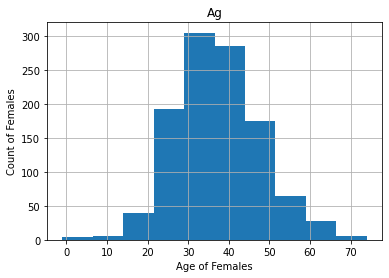

In [ ]:
# Plot 'Age' variable in a histogram
pd.DataFrame.hist(df[['Ag']])
plt.xlabel('Age of Females')
plt.ylabel('Count of Females')
plt.show()

In [33]:
#Frequency Table
table_female = pd.crosstab(df['Div/Tot'],df['Gun Tim'])
table_female

Gun Tim,1:00:02,1:00:10,1:00:12,1:00:13,1:00:14,1:00:16,1:00:17,1:00:18,1:00:21,1:00:24,1:00:28,1:00:29,1:00:30,1:00:31,1:00:32,1:00:35,1:00:37,1:00:38,1:00:40,1:00:44,1:00:46,1:00:47,1:00:50,1:00:52,1:00:53,1:00:54,1:00:55,1:00:56,1:00:57,1:00:58,1:01:03,1:01:05,1:01:07,1:01:12,1:01:16,1:01:17,1:01:18,1:01:25,1:01:26,1:01:28,...,D 1:10:18,D 1:10:26,D 1:10:45,D 1:11:00,D 1:11:58,D 1:12:26,D 1:13:18,D 1:13:35,D 1:13:42,D 1:14:27,D 1:14:52,D 1:15:57,D 1:16:16,D 1:16:32,D 1:16:36,D 1:17:26,D 1:17:59,D 1:18:35,D 1:19:05,D 1:20:17,D 1:22:06,D 1:22:53,D 1:24:38,D 1:24:44,D 1:25:50,D 1:26:24,D 1:27:38,D 1:37:00,D 1:43:36,D 1:44:08,D 1:44:10,D 1:50:31,M 47:04,M 1:01:09,M 1:08:05,M 1:11:12,M 1:12:56,M 1:17:45,N 1:08:39,V 1:04:19
Div/Tot,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1/110,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/142,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/173,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98/247,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
99/110,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
99/142,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
#Show the updated times 'transformed_time' by Divison
table_female_2 = pd.crosstab(df['Div/Tot'],df['transformed_time_f'])
table_female_2

transformed_time_f,1900-01-01 01:00:02,1900-01-01 01:00:10,1900-01-01 01:00:12,1900-01-01 01:00:13,1900-01-01 01:00:14,1900-01-01 01:00:16,1900-01-01 01:00:17,1900-01-01 01:00:18,1900-01-01 01:00:21,1900-01-01 01:00:24,1900-01-01 01:00:28,1900-01-01 01:00:29,1900-01-01 01:00:30,1900-01-01 01:00:31,1900-01-01 01:00:32,1900-01-01 01:00:35,1900-01-01 01:00:37,1900-01-01 01:00:38,1900-01-01 01:00:40,1900-01-01 01:00:44,1900-01-01 01:00:46,1900-01-01 01:00:47,1900-01-01 01:00:50,1900-01-01 01:00:52,1900-01-01 01:00:53,1900-01-01 01:00:54,1900-01-01 01:00:55,1900-01-01 01:00:56,1900-01-01 01:00:57,1900-01-01 01:00:58,1900-01-01 01:01:03,1900-01-01 01:01:05,1900-01-01 01:01:07,1900-01-01 01:01:12,1900-01-01 01:01:16,1900-01-01 01:01:17,1900-01-01 01:01:18,1900-01-01 01:01:25,1900-01-01 01:01:26,1900-01-01 01:01:28,...,1900-01-01 01:18:47,1900-01-01 01:18:48,1900-01-01 01:18:49,1900-01-01 01:19:05,1900-01-01 01:19:23,1900-01-01 01:19:29,1900-01-01 01:19:45,1900-01-01 01:19:52,1900-01-01 01:20:00,1900-01-01 01:20:07,1900-01-01 01:20:16,1900-01-01 01:20:32,1900-01-01 01:20:50,1900-01-01 01:21:15,1900-01-01 01:21:22,1900-01-01 01:21:55,1900-01-01 01:22:06,1900-01-01 01:22:14,1900-01-01 01:22:23,1900-01-01 01:22:34,1900-01-01 01:22:40,1900-01-01 01:22:53,1900-01-01 01:23:16,1900-01-01 01:23:38,1900-01-01 01:24:27,1900-01-01 01:24:36,1900-01-01 01:25:26,1900-01-01 01:25:34,1900-01-01 01:26:03,1900-01-01 01:26:19,1900-01-01 01:28:41,1900-01-01 01:31:25,1900-01-01 01:33:04,1900-01-01 01:34:54,1900-01-01 01:37:45,1900-01-01 01:37:54,1900-01-01 01:38:01,1900-01-01 01:43:47,1900-01-01 01:46:49,1900-01-01 01:50:31
Div/Tot,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10/19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10/28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
100/110,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
100/142,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
100/173,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98/142,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
98/173,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
99/110,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


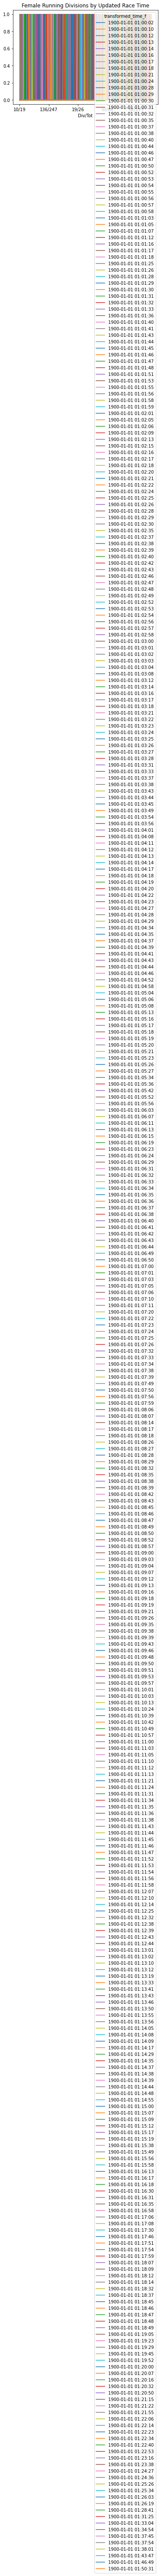

In [36]:
#Visualize Divisions by Race Time
table_female_2.plot()
plt.xlabel('Div/Tot')
plt.title('Female Running Divisions by Updated Race Time')
plt.show()

## Second Visual

In [38]:
# Second Visual summarizing female results.
#Need cohorts of the 99 divisions
table_4_f = df.groupby(['Div/Tot']).sum('Div/Tot')
table_4_f

,Place,Num,Ag
Div/Tot,,,
1/110,6,28,45.0
1/142,5,6,26.0
1/15,196,1399,14.0
1/173,21,2015,74.0
1/19,80,864,60.0
...,...,...,...
98/247,413,1697,38.0
99/110,998,146,48.0
99/142,751,763,25.0


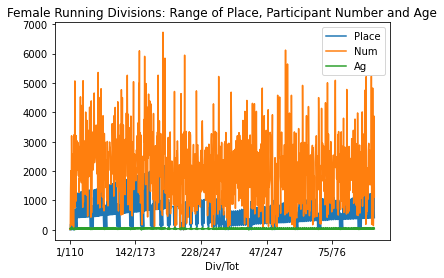

In [39]:
#Visualize the 'Div/Total' by Age aand Placement
table_4_f.plot()
plt.xlabel('Div/Tot')
plt.title('Female Running Divisions: Range of Place, Participant Number and Age')
plt.show()

## Third Visual

In [40]:
#Visualize Race Times by Divison
table_5_f = df.groupby(['Div/Tot']).mean('transformed_time_f')
table_5_f

,Place,Num,Ag
Div/Tot,,,
1/110,6.0,28.0,45.0
1/142,5.0,6.0,26.0
1/15,196.0,1399.0,14.0
1/173,10.5,1007.5,37.0
1/19,80.0,864.0,60.0
...,...,...,...
98/247,413.0,1697.0,38.0
99/110,998.0,146.0,48.0
99/142,751.0,763.0,25.0


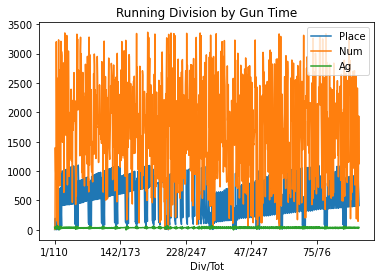

In [42]:
#Plot
table_5_f.plot()
plt.xlabel('Div/Tot')
plt.title('Running Division by Gun Time')
plt.show()

# Part 2 Analysis: Male Data Set

In [43]:
#Check data for Male Data 
# Debug Unicode error
df_male = pd.read_csv('/content/MA_Exer_PikesPeak_Males.txt', delimiter='\t', encoding='latin-1',parse_dates=['Gun Tim'])
df_male

,Place,Div/Tot,Num,Name,Ag,Hometown,Gun Tim,Net Tim,Pace
0,1,1/48,9,Joshua Kemei,22.0,Kenya .,28:48,28:47#,4:38
1,2,2/48,35,George Kirwa Misoi,22.0,Kenya .,29:11,29:10#,4:42
2,3,3/48,3,Jacob Frey,24.0,Oakton VA,29:38,29:37#,4:46
3,4,1/96,49,Gurmessa Kumsa,27.0,Oxon Hill MD,29:46,29:46#,4:48
4,5,4/48,31,Mike Baird,24.0,Ardmore PA,30:31,30:30,4:55
...,...,...,...,...,...,...,...,...,...
1260,1261,200/201,2792,Kenneth Winkfield,49.0,Bowie MD,1:35:50,1:30:29,14:34
1261,1262,50/50,63,Thom Hunter,63.0,Gaithersburg MD,1:42:41,1:37:20,15:40
1262,1263,96/96,1547,Nicholas Kelsch,27.0,Gaithersburg MD,1:43:00,1:37:50,15:45
1263,1264,201/201,3330,Cliff Chiet,45.0,Gaithersburg MD,1:44:07,1:38:46,15:54


In [4]:
#Check datatypes
df_male.dtypes

#Note: Div/Tot, 'Name', 'Gun Tim', 'Net Tim', and 'Pace' are all object types.
## Can't run mean or other numerical methods on our "time" features.

Place         int64
Div/Tot      object
Num           int64
Name         object
Ag          float64
Hometown     object
Gun Tim      object
Net Tim      object
Pace         object
dtype: object

In [26]:
#Look for missing values in male data set
df_male.isnull().sum()

Place       0
Div/Tot     2
Num         0
Name        0
Ag          1
Hometown    0
Gun Tim     0
Net Tim     0
Pace        0
dtype: int64

In [5]:
#Drop rows in male data that have missing 'Div/Tot' b/c we've got a question on comparing times
df_male = df_male.dropna(subset=['Div/Tot'], inplace=True)

In [42]:
df_male.head(5)

,Place,Div/Tot,Num,Name,Ag,Hometown,Gun Tim,Net Tim,Pace,transformed_time,transformed_net_time
0,1,1/48,9,Joshua Kemei,22.0,Kenya .,28:48,28:47#,4:38,NaT,NaT
1,2,2/48,35,George Kirwa Misoi,22.0,Kenya .,29:11,29:10#,4:42,NaT,NaT
2,3,3/48,3,Jacob Frey,24.0,Oakton VA,29:38,29:37#,4:46,NaT,NaT
3,4,1/96,49,Gurmessa Kumsa,27.0,Oxon Hill MD,29:46,29:46#,4:48,NaT,NaT
4,5,4/48,31,Mike Baird,24.0,Ardmore PA,30:31,30:30,4:55,NaT,NaT


In [28]:
#Explore Male race results by Age/'Ag'
df_male.sort_values('Ag')

,Place,Div/Tot,Num,Name,Ag,Hometown,Gun Tim,Net Tim,Pace
1209,1210,26/28,556,Chris Barr,-1.0,Germantown MD,1:15:39,1:10:30,11:21
791,792,15/28,1555,Jon Kesler,-1.0,Silver Spring MD,59:20,54:06,8:43
525,526,NaN,2003,Chris Nash,0.0,Brookeville MD,51:04,49:35,7:59
1225,1226,28/28,515,Gregory Aubertin,9.0,Rockville MD,1:16:21,1:12:26,11:40
1118,1119,24/28,1731,Jason Linzau,10.0,Silver Spring MD,1:06:44,1:03:01,10:09
...,...,...,...,...,...,...,...,...,...
878,879,3/6,2822,Nianxiang Xie,78.0,Rockville MD,56:22,56:17*,9:04
1231,1232,5/6,2849,Philip Zenchoff,78.0,Silver Spring MD,1:17:21,1:13:15,11:48
1230,1231,1/2,2092,Raymond Palfrey,81.0,Springfield VA,1:18:00,1:12:56*,11:45
1236,1237,2/2,2152,Frank Pierce,84.0,Silver Spring MD,1:14:28,1:14:23*,11:59


In [44]:
#Explore Male
df_male.describe()


,Place,Num,Ag
count,1265.000000,1265.000000,1264.000000
mean,633.000000,1704.905929,40.720728
std,365.318354,921.991095,12.410325
min,1.000000,3.000000,-1.000000
25%,317.000000,955.000000,33.000000
50%,633.000000,1709.000000,41.000000
75%,949.000000,2462.000000,49.000000
max,1265.000000,3356.000000,84.000000


In [10]:
#Check male data set for odd characters in string 'Net Tim'
df_male['Net Tim'].head(15)
## Look at the odd characters: '#' or '*'

0     28:47#
1     29:10#
2     29:37#
3     29:46#
4      30:30
5      31:13
6      31:38
7      31:39
8      31:55
9     32:30*
10     32:31
11     32:52
12     32:56
13     33:00
14    33:06*
Name: Net Tim, dtype: object

In [11]:
#Create new series to extract symbols from times
new_net_time = df_male['Net Tim']
print(new_net_time)

0        28:47#
1        29:10#
2        29:37#
3        29:46#
4         30:30
         ...   
1260    1:30:29
1261    1:37:20
1262    1:37:50
1263    1:38:46
1264    1:40:38
Name: Net Tim, Length: 1265, dtype: object


In [34]:
#Strip '*' from end of 'Net Tim'
print(new_net_time.str.strip('*'))

0         28:47
1         29:10
2         29:37
3         29:46
4         30:30
         ...   
1260    1:30:29
1261    1:37:20
1262    1:37:50
1263    1:38:46
1264    1:40:38
Name: Net Tim, Length: 1265, dtype: object


In [33]:
#Strip '#' from end of 'Net Tim'
new_net_time = new_net_time.str.strip('#')
print(new_net_time)


0         28:47
1         29:10
2         29:37
3         29:46
4         30:30
         ...   
1260    1:30:29
1261    1:37:20
1262    1:37:50
1263    1:38:46
1264    1:40:38
Name: Net Tim, Length: 1265, dtype: object


In [12]:
#Confirm that 'Gun Tim' is read as object data type before transformation
df_male['Gun Tim'].dtype

dtype('O')

In [13]:
# Splice 'Gun Tim' column as updated series
updated_gun_time =df_male['Gun Tim']
updated_gun_time.head(10)

0    28:48
1    29:11
2    29:38
3    29:46
4    30:31
5    31:14
6    31:40
7    31:39
8    31:55
9    32:30
Name: Gun Tim, dtype: object

In [38]:
#Locate 2nd row of new series
test_time = updated_gun_time.iloc[1]
test_time

'29:11'

In [45]:
#to convert time format 'Gun Tim' column which is an object to readable timestamp
df_male['transformed_time'] = pd.to_datetime(df_male['Gun Tim'], format='%H:%M:%S', errors='coerce')
df_male['transformed_time']

0                      NaT
1                      NaT
2                      NaT
3                      NaT
4                      NaT
               ...        
1260   1900-01-01 01:35:50
1261   1900-01-01 01:42:41
1262   1900-01-01 01:43:00
1263   1900-01-01 01:44:07
1264   1900-01-01 01:43:47
Name: transformed_time, Length: 1265, dtype: datetime64[ns]

In [46]:
df_male['transformed_time'].dtype

dtype('<M8[ns]')

In [51]:
#Calculate Maximum
max = df_male['transformed_time'].max()
max

Timestamp('1900-01-01 01:44:07')

In [52]:
#Calculate Minimum
min = df_male['transformed_time'].min()
min
#This must be wrong. The first place winner completed a 'Gun Tim' of 28 minutes and 48 seconds at a 4.38 minute pace.

Timestamp('1900-01-01 01:00:01')

### Analyst Note: The slowest time, represented by Maximum of transformed 'Gun Tim' is 1 hour, 44 minutes and 7 seconds, according to Timstamp. The fastest time, represented by Minimum of transformed 'Gun Tim' is 1 hour and 1 second. However, this is wrong because the first place winner completed a 'Gun Tim' of 28 minutes and 48 seconds at a 4.38 minute pace, according to our sorting values of 'transformed_time' in ascending order in cell below 'mean_gun_time' calculation.

In [15]:
#Calculate mean of 'Gun Tim', now 'transformed_time'
mean_gun_time = df_male['transformed_time'].mean()
mean_gun_time

Timestamp('1900-01-01 01:07:24.124662784')

### Analyst Note: The mean time for male runners is 1 hour, 7 minutes, and 24 seconds.

In [17]:
#Sort and rank values of transformed 'Gun Tim' to determine Median

median_gun = df_male.sort_values(by='transformed_time', ascending=False, na_position='first')
median_gun

,Place,Div/Tot,Num,Name,Ag,Hometown,Gun Tim,Net Tim,Pace,transformed_time,transformed_net_time
0,1,1/48,9,Joshua Kemei,22.0,Kenya .,28:48,28:47#,4:38,NaT,NaT
1,2,2/48,35,George Kirwa Misoi,22.0,Kenya .,29:11,29:10#,4:42,NaT,NaT
2,3,3/48,3,Jacob Frey,24.0,Oakton VA,29:38,29:37#,4:46,NaT,NaT
3,4,1/96,49,Gurmessa Kumsa,27.0,Oxon Hill MD,29:46,29:46#,4:48,NaT,NaT
4,5,4/48,31,Mike Baird,24.0,Ardmore PA,30:31,30:30,4:55,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...
898,899,142/201,460,Craig Alexander,46.0,Bethesda MD,1:00:05,56:45,9:08,1900-01-01 01:00:05,NaT
889,890,166/214,1772,Jeff Macafee,41.0,Germantown MD,1:00:04,56:37,9:07,1900-01-01 01:00:04,NaT
881,882,99/132,2780,Clarence Williams,51.0,Germantown MD,1:00:03,56:21,9:05,1900-01-01 01:00:03,NaT
862,863,66/96,785,Glen Chin,28.0,Temple Hills MD,1:00:01,55:54,9:00,1900-01-01 01:00:01,NaT


In [21]:
#Calculate 'median' by obtaining middle value (50% percentile) of 1,265 rows
median_male = (1266)/2
median_male #Odd number of rows. 

633.0

### Analyst Note on Median for Males: 
We have an odd number of rows. Locate Runner Record 632, which is the 633rd row.

In [22]:
#Median 'Gun Tim'
median_gun.iloc[633]

Place                              634
Div/Tot                         99/203
Num                               1210
Name                    Vincent George
Ag                                  37
Hometown                   Bethesda MD
Gun Tim                          55:31
Net Tim                          51:25
Pace                              8:17
transformed_time                   NaT
transformed_net_time               NaT
Name: 633, dtype: object

### Analyst Note: The median 'transformed_time', which is transformed from 'Gun Tim' as a clean column with values for analysis of male participants, is 55 minutes and 31 seconds. 

The average 'Gun Tim' for male participants is 1 hour, 7 minutes, and 24 seconds.

In [16]:
#For Question 2: Need toconvert time format 'Net Tim' column which is an object to readable timestamp
df_male['transformed_net_time'] = pd.to_datetime(df_male['Net Tim'], format='%H:%M:%S', errors='coerce')
df_male['transformed_net_time']

0                      NaT
1                      NaT
2                      NaT
3                      NaT
4                      NaT
               ...        
1260   1900-01-01 01:30:29
1261   1900-01-01 01:37:20
1262   1900-01-01 01:37:50
1263   1900-01-01 01:38:46
1264   1900-01-01 01:40:38
Name: transformed_net_time, Length: 1265, dtype: datetime64[ns]

In [57]:
#Calculate mean of 'Net Tim', now 'transformed_net_time'
mean_net_time = df_male['transformed_net_time'].mean()
mean_net_time 

Timestamp('1900-01-01 01:07:51.326633216')

The average 'Net Tim' for male participants is 1 hour, 7 minutes, and 51 seconds.

The average mean age for male racers is 40.7 years old. The mode agae for male racers is 41. Based on the value_counts method, we see that the mode of 'Ag' among males is 44 years (54 records). Overall, male race participants' age range is between -1 and 84 years of age. 

In [ ]:
#Mean, Median, Mode for Male race results based on age.
df_male.value_counts('Ag')

Ag
44.0    54
36.0    53
40.0    49
45.0    46
48.0    43
        ..
11.0     1
10.0     1
9.0      1
0.0      1
84.0     1
Length: 71, dtype: int64

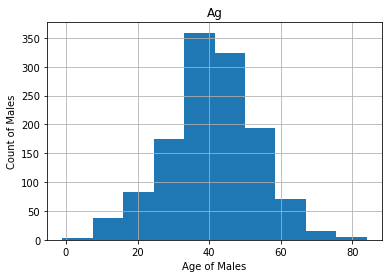

In [ ]:
# Plot 'Age' variable in a second histogram
pd.DataFrame.hist(df_male[['Ag']])
plt.xlabel('Age of Males')
plt.ylabel('Count of Males')
plt.show()

In [38]:
new_net_time.head(5)

0    28:47
1    29:10
2    29:37
3    29:46
4    30:30
Name: Net Tim, dtype: object

In [ ]:
#Show the Mean, Median, Mode for Male race participants' race results based on time completion: 'Gun Tim'.
#Mode identified through value_counts method
df_male.value_counts('Gun Tim')

Gun Tim
55:13      5
1:04:56    5
57:42      4
55:54      4
1:01:33    4
          ..
47:44      1
47:43      1
47:29      1
47:28      1
44:57      1
Length: 985, dtype: int64

## Question 2: Analyze Difference between 'Gun Tim' and 'Net Tim'


### Pre-Processing: Convert TimeStamp Column for Analysis


In [60]:
#Calculate difference by subtracting mean 'Gun Tim' from mean 'Net Tim'.
difference_bewteen_gun_net_time = mean_net_time - mean_gun_time 
difference_bewteen_gun_net_time

Timedelta('0 days 00:00:27.201970432')

### Analyst Note: We calculuated the difference between mean 'Net Tim' and mean 'Gun Tim' among male runners as 'difference_between_gun_net_time'. The difference was 27.2 seconds, according to the Timedelta. (Timedelta represents calculated difference in time period.)

In [18]:
df.head(5)

,Place,Div/Tot,Num,Name,Ag,Hometown,Gun Tim,Net Tim,Pace
0,1,1/86,30,Florence Jepkosgei,22.0,Kenya .,32:59,32:58#,5:19
1,2,2/86,8,Eunice Chepkirui,21.0,Kenya .,33:14,33:13#,5:21
2,3,1/247,3200,Elena Orlova,36.0,Gaithersburg MD,34:26,34:25#,5:33
3,4,1/173,2,Susannah Kvasnicka,34.0,Great Falls VA,34:43,34:42#,5:35
4,5,1/142,6,Casey Smith,26.0,Arlington VA,35:04,35:02,5:39


In [32]:
#Same for Female data set: Strip '*' from end of 'Net Tim'
print(new_net_time_f.str.strip('*'))

0        32:58#
1        33:13#
2        34:25#
3        34:42#
4         35:02
         ...   
1100    1:40:39
1101    1:45:22
1102    1:45:22
1103    1:46:49
1104    1:46:49
Name: Net Tim, Length: 1105, dtype: object


In [40]:
#Strip '#' from end of 'Net Tim'
new_net_time_f = new_net_time.str.strip('#')
print(new_net_time_f)

0         28:47
1         29:10
2         29:37
3         29:46
4         30:30
         ...   
1260    1:30:29
1261    1:37:20
1262    1:37:50
1263    1:38:46
1264    1:40:38
Name: Net Tim, Length: 1265, dtype: object


In [41]:
#add column 'new_net_time'
df['new_net_time'] = new_net_time_f

In [42]:
#Check the newly added column b/c need to use that for analysis
df.columns

Index(['Place', 'Div/Tot', 'Num', 'Name', 'Ag', 'Hometown', 'Gun Tim',
       'Net Tim', 'Pace', 'new_net_time'],
      dtype='object')

We see that the mode of 'Gun Tim' (time from race gun triggered start to finish) is a tie between a) 55 minutes and 13 seconds with b) one hour, four minutes and fifty-six seconds. 

## Question 3: How much time separates Chris Doe from the top 10 percentile of racers of the same division? 

In [37]:
# Retrieve row of "Chris Doe' by loc method
df_male[df_male.Name == 'Chris Doe']

#Chris Doe ranked 108th of the 214 runners in his Division 
#To identify his Division, Need to identify all runners in Div 106 
## Find string containing '108' in "Div"
### df_male[df_male['Div/Tot']== '108/214']



,Place,Div/Tot,Num,Name,Ag,Hometown,Gun Tim,Net Tim,Pace,transformed_time,transformed_net_time
534,535,108/214,2869,Chris Doe,44.0,Reson VA,53:07,49:43,8:00,NaT,NaT


In [62]:
#Step a: splice column
#Step b: identify cohort
cohort = df_male['Div/Tot']
cohort

0          1/48
1          2/48
2          3/48
3          1/96
4          4/48
         ...   
1260    200/201
1261      50/50
1262      96/96
1263    201/201
1264      73/73
Name: Div/Tot, Length: 1265, dtype: object

In [65]:
#Step b: identify cohort and pull w/startswith()
result = cohort.str.startswith('108')
df_male['cohort'] = result
print(result) #same as print(df_male['cohort'])

0       False
1       False
2       False
3       False
4       False
        ...  
1260    False
1261    False
1262    False
1263    False
1264    False
Name: Div/Tot, Length: 1265, dtype: object


In [70]:
result.describe()

count      1263
unique        2
top       False
freq       1258
Name: Div/Tot, dtype: object

In [73]:
result.head(21)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
Name: Div/Tot, dtype: object

In [28]:
#Locate in table_male the 'Div/Tot of 108
test = table_male.loc['108/1':'108/214']
test

Gun Tim,1:00:01,1:00:03,1:00:04,1:00:05,1:00:06,1:00:11,1:00:13,1:00:15,1:00:18,1:00:19,1:00:20,1:00:21,1:00:22,1:00:25,1:00:26,1:00:29,1:00:31,1:00:32,1:00:35,1:00:37,1:00:38,1:00:39,1:00:40,1:00:41,1:00:43,1:00:46,1:00:47,1:00:48,1:00:49,1:00:50,1:00:52,1:00:53,1:00:54,1:00:55,1:00:59,1:01:00,1:01:01,1:01:05,1:01:06,1:01:07,...,58:40,58:41,58:42,58:44,58:45,58:50,58:51,58:53,58:54,59:00,59:01,59:02,59:03,59:04,59:05,59:08,59:09,59:11,59:12,59:16,59:18,59:19,59:20,59:21,59:23,59:26,59:32,59:37,59:38,59:39,59:40,59:42,59:43,59:45,59:46,59:47,59:52,59:53,59:54,59:57
Div/Tot,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
108/132,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
108/143,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
108/201,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
108/203,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
108/214,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [69]:
#Identify cohorts
chris = df_male['Div/Tot'].value_counts(normalize=True)
chris

17/203     0.000792
67/132     0.000792
185/201    0.000792
5/203      0.000792
11/19      0.000792
             ...   
5/143      0.000792
10/214     0.000792
61/203     0.000792
130/201    0.000792
156/201    0.000792
Name: Div/Tot, Length: 1263, dtype: float64

In [91]:
#Find method
string = df_male['Div/Tot']
string
#question = string.count('108')
#question

0          1/48
1          2/48
2          3/48
3          1/96
4          4/48
         ...   
1260    200/201
1261      50/50
1262      96/96
1263    201/201
1264      73/73
Name: Div/Tot, Length: 1265, dtype: object

In [64]:
#Review values
df_male['cohort'].value_counts()

False    1258
True        5
Name: cohort, dtype: int64

We see that Chris is in Division 108, which has a total of 214 other male runners. The top ten percent of his division includes 21 runners (rounding down from 21.4). Therefore we have to identify the 21st runner's time in Division 108 to calculate the time separating Chris Doe's time from the top 10 percential of racers of the same division. 

In [25]:
#Subset Doe's division dataset to identify top 10%
#chris_cohort = df_male[[df_male['Div/Tot']== result]]
upper_ten_percent = pd.qcut(df_male['transformed_net_time'],[0.05, 0.1, 0.25, 0.5,0.75, 1])
upper_ten_percent

0                                                     NaN
1                                                     NaN
2                                                     NaN
3                                                     NaN
4                                                     NaN
                              ...                        
1260    (1900-01-01 01:10:46.500000, 1900-01-01 01:40:38]
1261    (1900-01-01 01:10:46.500000, 1900-01-01 01:40:38]
1262    (1900-01-01 01:10:46.500000, 1900-01-01 01:40:38]
1263    (1900-01-01 01:10:46.500000, 1900-01-01 01:40:38]
1264    (1900-01-01 01:10:46.500000, 1900-01-01 01:40:38]
Name: transformed_net_time, Length: 1265, dtype: category
Categories (5, interval[datetime64[ns]]): [ <
                                           (1900-01-01 01:00:21.899999999, 1900-01-01 01:... <
                                           (1900-01-01 01:00:44.800000, 1900-01-01 01:02:... <
                                           (1900-01-01 01:02:49.5000

### Analyst Note: We see that the top ten percent among male participants is: '01:00:44.800000', which is 1 hour and 44 seconds. Chris Doe ran 53:07. He was 7 minutes and 37 seconds faster than the entire cohort of male participants. 

In [29]:
#Use test instead of whole running sample
upper_ten_percent_cohort = pd.qcut(test,[0.05, 0.1, 0.25, 0.5,0.75, 1])
upper_ten_percent_cohort

ValueError: ignored

In [66]:
#Create series from Chris Doe's divison
#Find 108 string in 'Div/Tot'

df_chris_div = df_male.loc[df_male['Div/Tot'] == "108"]
print(df_chris_div)

Empty DataFrame
Columns: [Place, Div/Tot, Num, Name, Ag, Hometown, Gun Tim, Net Tim, Pace]
Index: []


In [ ]:
#Find string '108' in 'Div/Tot' label using .startswith method
result = df_male['Div/Tot'].str.startswith('108 ')
print(result)

0       False
1       False
2       False
3       False
4       False
        ...  
1260    False
1261    False
1262    False
1263    False
1264    False
Name: Div/Tot, Length: 1265, dtype: object


In [30]:
#Upper 10th Percentile Series.quartile() function returns the specific value of a quantile based on the parameter ‘q‘.
#Need to convert 'Gun Tim' to numeric so that we can sequence numbers
#tenth = df_male["Gun Tim"]
#print("1st Percentile:%.2f"%tenth.quantile(.1))

In [65]:
result.value_counts()

False    1258
True        5
Name: Div/Tot, dtype: int64

# Question 4: Compare race results of each division

In [27]:
#Frequency Table
table_male = pd.crosstab(df_male['Div/Tot'],df_male['Gun Tim'])
table_male

Gun Tim,1:00:01,1:00:03,1:00:04,1:00:05,1:00:06,1:00:11,1:00:13,1:00:15,1:00:18,1:00:19,1:00:20,1:00:21,1:00:22,1:00:25,1:00:26,1:00:29,1:00:31,1:00:32,1:00:35,1:00:37,1:00:38,1:00:39,1:00:40,1:00:41,1:00:43,1:00:46,1:00:47,1:00:48,1:00:49,1:00:50,1:00:52,1:00:53,1:00:54,1:00:55,1:00:59,1:01:00,1:01:01,1:01:05,1:01:06,1:01:07,...,58:40,58:41,58:42,58:44,58:45,58:50,58:51,58:53,58:54,59:00,59:01,59:02,59:03,59:04,59:05,59:08,59:09,59:11,59:12,59:16,59:18,59:19,59:20,59:21,59:23,59:26,59:32,59:37,59:38,59:39,59:40,59:42,59:43,59:45,59:46,59:47,59:52,59:53,59:54,59:57
Div/Tot,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1/132,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/143,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/201,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99/132,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
99/143,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
99/201,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Answer Question 4 with Groupby to compare race results of each division
df_male.groupby(['Div/Tot','Hometown']).count()

,,Place,Num,Name,Ag,Gun Tim,Net Tim,Pace
Div/Tot,Hometown,,,,,,,
1/132,Perkasie PA,1,1,1,1,1,1,1
1/143,Wheaton MD,1,1,1,1,1,1,1
1/19,Columbia MD,1,1,1,1,1,1,1
1/2,Springfield VA,1,1,1,1,1,1,1
1/201,Herndon VA,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
99/132,Germantown MD,1,1,1,1,1,1,1
99/143,Wheaton MD,1,1,1,1,1,1,1
99/201,Potomac MD,1,1,1,1,1,1,1


## Second Visual for Men's Results

In [43]:
#Show the updated times 'transformed_time' by Divison
table_male_2 = pd.crosstab(df_male['Div/Tot'],df_male['transformed_time'])
table_male_2

transformed_time,1900-01-01 01:00:01,1900-01-01 01:00:03,1900-01-01 01:00:04,1900-01-01 01:00:05,1900-01-01 01:00:06,1900-01-01 01:00:11,1900-01-01 01:00:13,1900-01-01 01:00:15,1900-01-01 01:00:18,1900-01-01 01:00:19,1900-01-01 01:00:20,1900-01-01 01:00:21,1900-01-01 01:00:22,1900-01-01 01:00:25,1900-01-01 01:00:26,1900-01-01 01:00:29,1900-01-01 01:00:31,1900-01-01 01:00:32,1900-01-01 01:00:35,1900-01-01 01:00:37,1900-01-01 01:00:38,1900-01-01 01:00:39,1900-01-01 01:00:40,1900-01-01 01:00:41,1900-01-01 01:00:43,1900-01-01 01:00:46,1900-01-01 01:00:47,1900-01-01 01:00:48,1900-01-01 01:00:49,1900-01-01 01:00:50,1900-01-01 01:00:52,1900-01-01 01:00:53,1900-01-01 01:00:54,1900-01-01 01:00:55,1900-01-01 01:00:59,1900-01-01 01:01:00,1900-01-01 01:01:01,1900-01-01 01:01:05,1900-01-01 01:01:06,1900-01-01 01:01:07,...,1900-01-01 01:16:30,1900-01-01 01:16:33,1900-01-01 01:16:47,1900-01-01 01:16:51,1900-01-01 01:17:17,1900-01-01 01:17:19,1900-01-01 01:17:21,1900-01-01 01:17:38,1900-01-01 01:17:46,1900-01-01 01:18:00,1900-01-01 01:18:26,1900-01-01 01:18:50,1900-01-01 01:18:54,1900-01-01 01:18:57,1900-01-01 01:19:00,1900-01-01 01:19:55,1900-01-01 01:20:00,1900-01-01 01:20:04,1900-01-01 01:20:07,1900-01-01 01:21:42,1900-01-01 01:22:14,1900-01-01 01:23:22,1900-01-01 01:23:43,1900-01-01 01:23:48,1900-01-01 01:23:53,1900-01-01 01:23:57,1900-01-01 01:23:59,1900-01-01 01:24:36,1900-01-01 01:25:00,1900-01-01 01:25:17,1900-01-01 01:25:26,1900-01-01 01:25:40,1900-01-01 01:25:59,1900-01-01 01:27:38,1900-01-01 01:32:44,1900-01-01 01:35:50,1900-01-01 01:42:41,1900-01-01 01:43:00,1900-01-01 01:43:47,1900-01-01 01:44:07
Div/Tot,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1/2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10/19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
100/132,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
101/132,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
102/143,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93/96,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
94/96,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
95/96,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


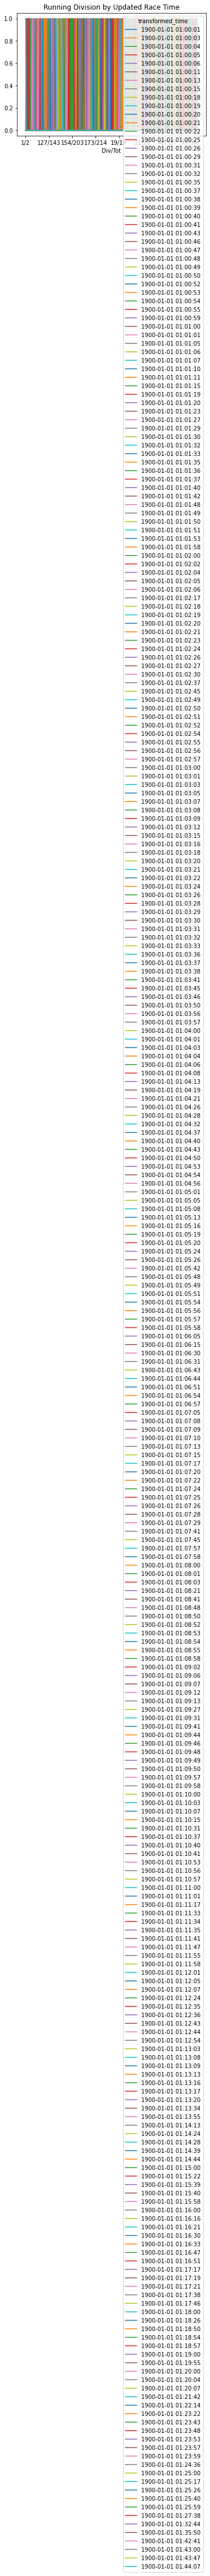

In [44]:
#Visualize Divisions by Race Time
table_male_2.plot()
plt.xlabel('Div/Tot')
plt.title('Running Division by Updated Race Time')
plt.show()

## Third Visual for Men's Results

In [32]:
#Need cohorts of the 99 divisions
table_4 = df_male.groupby(['Div/Tot']).sum('Div/Tot')
table_4


,Place,Num,Ag
Div/Tot,,,
1/132,20,2135,51.0
1/143,7,11,33.0
1/19,142,23,67.0
1/2,1231,2092,81.0
1/201,15,15,48.0
...,...,...,...
99/132,882,2780,51.0
99/143,856,2943,31.0
99/201,658,966,45.0


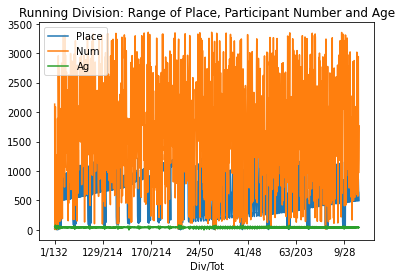

In [36]:
#Visualize the 'Div/Total'
table_4.plot()
plt.xlabel('Div/Tot')
plt.title('Running Division: Range of Place, Participant Number and Age')
plt.show()

In [39]:
#Visualize Race Results by Division
table_5 = df_male.groupby(['Div/Tot']).mean('Gun Tim')
table_5

,Place,Num,Ag
Div/Tot,,,
1/132,20,2135,51.0
1/143,7,11,33.0
1/19,142,23,67.0
1/2,1231,2092,81.0
1/201,15,15,48.0
...,...,...,...
99/132,882,2780,51.0
99/143,856,2943,31.0
99/201,658,966,45.0


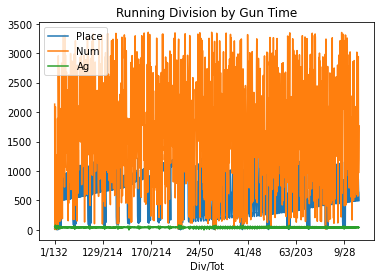

In [41]:
table_5.plot()
plt.xlabel('Div/Tot')
plt.title('Running Division by Gun Time')
plt.show()

In [46]:
#Tedious grouping calculation
#df_male.groupby(['Hometown']).plot(kind='bar')